let's get started!

In [17]:
import pandas as pd
data = pd.read_csv("data/data1.csv")
data


,title,article,label
0,(EU 17 2017 establishment Union framework coll...,1.With view (EU Regulation management biologic...,fishing industry
1,Regulation (EU) 2019/833 European Parliament C...,1.This Regulation Union fishing vessels use pu...,conservation of fish stocks
2,Regulation (EU 1303/2013 European Parliament C...,Regulation common rules European Regional Deve...,European Regional Development Fund
3,Regulation (EU) 2019/473 European Parliament C...,Regulation provision European Fisheries Contro...,fishery management


0.24.2


source: https://machinelearningmastery.com/multi-output-regression-models-with-python/

In [22]:
# !pip install gensim
# !pip install PyLDAvis


In [24]:
#combine the texts in 'title' and 'article'
features = data['title'] + " " + data['article']
features

0    (EU 17 2017 establishment Union framework coll...
1    Regulation (EU) 2019/833 European Parliament C...
2    Regulation (EU 1303/2013 European Parliament C...
3    Regulation (EU) 2019/473 European Parliament C...
dtype: object

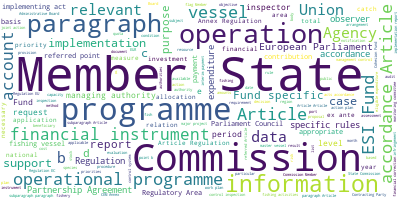

In [30]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the features into a single string.
# single_string = " ".join(story_str_column)
single_string= features.str.cat(sep=" ")

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud from the text string
wordcloud.generate(single_string)

# Visualize the word cloud
wordcloud.to_image()


In [31]:
single_string

'(EU 17 2017 establishment Union framework collection management use data fisheries sector Council Regulation (EC 1.With view (EU Regulation management biological, environmental, technical socioeconomic data fisheries sector Article Regulation (EU 1380/2013.2.The data paragraph shall collected obligation collect Union legal acts Regulation.3.For data necessary fisheries management Union legal acts Regulation rules transmission data , processing, management use data collected Regulation (EC (EC 223/2009.For purposes Regulation referred Article 4 Regulation (EU addition definitions sector activities related commercial fisheries recreational fisheries aquaculture industries processing fisheries products;(2)recreational fisheries non-commercial fishing activities marine biological resources recreation tourism sport;(3)marine region geographical area Article 4(2 area regional fisheries management organisations area implementing act Article 9(11);(4)primary data data associated individual ve

Now use [gensim simple_preprocess](https://tedboy.github.io/nlps/generated/generated/gensim.utils.simple_preprocess.html)
to lower-case and tokenize the features


In [35]:
import re
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
     return [gensim.utils.simple_preprocess(str(sentence), deacc=True) for sentence in sentences]

# tokenised_stces = list(sent_to_words(single_string))
tokenised_stces = sent_to_words(features)
# print(tokenised_stces[:3])
print(tokenised_stces)


[['eu', 'establishment', 'union', 'framework', 'collection', 'management', 'use', 'data', 'fisheries', 'sector', 'council', 'regulation', 'ec', 'with', 'view', 'eu', 'regulation', 'management', 'biological', 'environmental', 'technical', 'socioeconomic', 'data', 'fisheries', 'sector', 'article', 'regulation', 'eu', 'the', 'data', 'paragraph', 'shall', 'collected', 'obligation', 'collect', 'union', 'legal', 'acts', 'regulation', 'for', 'data', 'necessary', 'fisheries', 'management', 'union', 'legal', 'acts', 'regulation', 'rules', 'transmission', 'data', 'processing', 'management', 'use', 'data', 'collected', 'regulation', 'ec', 'ec', 'for', 'purposes', 'regulation', 'referred', 'article', 'regulation', 'eu', 'addition', 'definitions', 'sector', 'activities', 'related', 'commercial', 'fisheries', 'recreational', 'fisheries', 'aquaculture', 'industries', 'processing', 'fisheries', 'products', 'recreational', 'fisheries', 'non', 'commercial', 'fishing', 'activities', 'marine', 'biological

In [43]:
import nltk
# nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\salbo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [45]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
# text = ['Nick','not ','too', 'fond', 'of', 'tennis']

# preprocessing
# remove stop words is done initially

lemmatizer = WordNetLemmatizer()

def lemmatize_word(word):
    return lemmatizer.lemmatize(word)

lemmatize_word_lis = []
for i in tokenised_stces:
    for word in i:
        lemmatize_word_lis.append(lemmatize_word(word))
# lemmatize_word_lis

def pos_tag(string):
    return nltk.pos_tag(string)
rm_tag = ['JJ','NN','RB','VB']
rm_pos = [x for (x,y) in pos_tag(lemmatize_word_lis) if y in rm_tag]

print(len(lemmatize_word_lis))
print(len(rm_pos))



32272
27844
